## Linear Regression in Python - Machine Learning From Scratch 02 - Python Tutorial
https://www.youtube.com/watch?v=4swNt7PiamQ

#### Approximation
$\hat y = wx + b$

#### Cost function

$MSE = J(w,b) = \frac{1}{N} \sum (y_i - (w x_i + b))^2 $

$
\begin{align}
 J'(m,b)  =   \begin{bmatrix}
                  \frac{df}{dw}\\
                  \frac{df}{dw}
             \end{bmatrix}
          = \begin{bmatrix}
               \frac{1}{N} \sum -2x_i(y_i - (wx_i + b))\\
               \frac{1}{N} \sum -2(y_i - (wx_i + b))
             \end{bmatrix}
\end{align}
$

##### Update rules

$w = w - \alpha * dw$
$b = b - \alpha * db$

$dw$ is symbolic notatiob for $\frac{dJ}{dw}$, and $db$ for  $\frac{dJ}{db}$



In [1]:
class Linear():
    def __init__(self, lr=0.1, n_iters = 10000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # we implemet gradient descent method
        # 1. Init parametrs
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iters):
            #firs we calculate gdariets, ie J
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1.0/n_samples) * (-2 ) * np.dot(X.T, y - y_predicted)
            db = (1.0/n_samples) * (-2 ) * np.sum(y - y_predicted)
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted




def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted)**2)

In [2]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import datasets


In [3]:
X, y  = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state=4)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [5]:
print(X_train.shape)
print(y_train.shape)

(80, 1)
(80,)


In [6]:
regressor = Linear()
regressor.fit(X_train, y_train)
print(f"regressor.weights: {regressor.weights}, bias {regressor.bias}")
y_predicted= regressor.predict(X_train)
print(f"mse:{mse(y_train, y_predicted)}")

regressor.weights: [75.05935146], bias -0.14241608558826233
mse:286.38301931945614


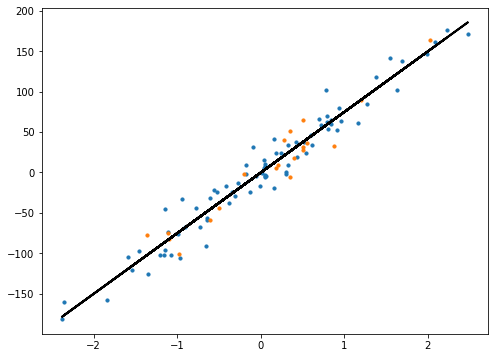

In [7]:
%matplotlib inline 
import matplotlib.pyplot as plt


y_pred_line  = regressor.predict(X)
#cmap = plt.get('viridis')
fig = plt.figure(figsize = (8,6))
m1 = plt.scatter(X_train, y_train, s = 10)
m2 = plt.scatter(X_test, y_test, s = 10)
plt.plot(X, y_pred_line, color = 'black', linewidth = 2, label="Prediction")
plt.show()